<a href="https://colab.research.google.com/github/qazalkz/ML_step_by_step/blob/main/cifar10_m_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step



Label	Description
*   0	airplane
*   1	automobile
*   2	bird
*   3	cat
*   4	deer
*   5	dog
*   6	frog
*   7	horse
*   8	ship
*   9	truck

In [3]:
print("training data shape", x_train.shape)
print("training lable shape", y_train.shape)
print("test data shape", x_test.shape)
print("test lable shape", y_test.shape)

training data shape (50000, 32, 32, 3)
training lable shape (50000, 1)
test data shape (10000, 32, 32, 3)
test lable shape (10000, 1)


مقدار هر پیکسل رو از 0-255 به 0-1 نرمالایز میکنیم تا زودتر مدلمون همگرا بشه و به نتیجه برسه با توحه به اینکه این پیکسل ها هر کدوم در وزن ها ضرب میشن

In [4]:
# normalize inputs from 0-255 to between 0 and 1 by dividing by 255
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255.0
x_test = x_test / 255.0

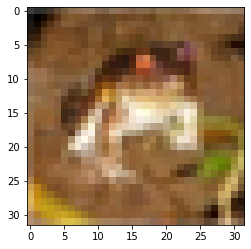

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

لیبل ها رو وان هات میکنیم تا برای مدل قابل فهم  باشه. چون خروجی مدل برای کلاس درست 1 بشه و برای سایر کلاسها 0 بشه

In [7]:
# one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
num_class = y_test.shape[1]
num_class

10

In [10]:
input_shape=x_train.shape[1:]
input_shape

(32, 32, 3)

##**Building Model**

In [33]:

# sequential ترتیبی
model = Sequential()
# adding layers
# 32 filter, (3,3) filter size, input shape , activition func
model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:], activation="relu"))
model.add(Dropout(0.2))   # how %many norons turn off 
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3), padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
# dense with 32 noron
model.add(Dropout(0.2))

model.add(Dense(32, activation=("relu")))
#output with 10 class and activation fuction softmax as a probability output
model.add(Dense(num_class, activation = "softmax"))


In [34]:
from sklearn import metrics
                                                                # معبار خوب بودن یا نبودن عملکرد
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)       

##**training the model**

batch size  5000/64 = 782

In [36]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30 , batch_size=64)

Epoch 1/30
782/782 [==============================] - 9s 11ms/step - loss: 1.5265 - accuracy: 0.4578 - val_loss: 1.5195 - val_accuracy: 0.4954
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 1.0250 - accuracy: 0.6370 - val_loss: 0.9051 - val_accuracy: 0.6858
Epoch 3/30
782/782 [==============================] - 8s 10ms/step - loss: 0.8484 - accuracy: 0.6972 - val_loss: 0.7975 - val_accuracy: 0.7281
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 0.7563 - accuracy: 0.7340 - val_loss: 0.7638 - val_accuracy: 0.7351
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.6906 - accuracy: 0.7567 - val_loss: 0.7056 - val_accuracy: 0.7596
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 0.6401 - accuracy: 0.7745 - val_loss: 0.6816 - val_accuracy: 0.7611
Epoch 7/30
782/782 [==============================] - 8s 10ms/step - loss: 0.5962 - accuracy: 0.7897 - val_loss: 0.6854 - val_accuracy: 0.7630

In [37]:
for k,v in history.history.items():
    print(k)

loss
accuracy
val_loss
val_accuracy


لاس ولیدیشن سبزه رفته بالا و نشون دهتده اور فیت شدن مدل هست. لاس ترین و ولیدیشن باید مقابشه بشن. وقتی دقت ترین داره بهبود پیدا میکنه اما ولیدیشن نه، یعنی اور فیت رخ داده یعنی مدل حفط کرده داده ها رو
*    دراپ اوت یا اگمنتیشن راه حل برخورد با اورفیت هست
*    اورفیت یعنی مدل فقط داده رو حفظ رده و یاد نگرفته بنابراین وقتی داده جدید بهش میدیم نمیتونه درست جواب بده و لاسش زیاد میشه
*    دراپ اوت: رندوم چندتا از نورون ها رو خاموش میکنه تا تنبل نشن و فقط داده ها رو حفظ نکنه. و دفعه بعد چندتا دیگه رو رندوم خاموش میکنه
*    بچ نرمالایزیشن در هر لایه خروجیش رو نرمال میکنه

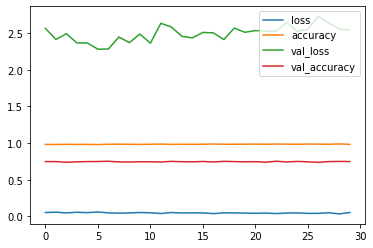

In [25]:
import pandas as pd
#pd.DataFrame(history.history).plot()   first try

این مدل پایینی قابل اطمینان تره

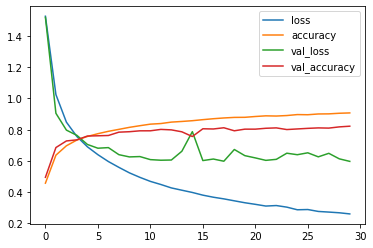

In [38]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show>

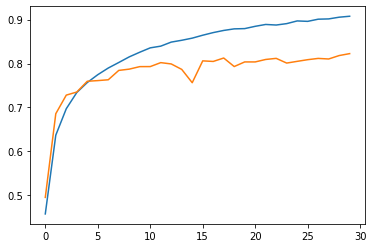

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show

In [41]:
model.save("CNN_cifar10.h5")

In [43]:
model2 = load_model("CNN_cifar10.h5")

In [46]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [56]:
pr = model2.predict(x_test[0:10])[0]   # output for first image
print(pr)

[8.5746557e-05 3.7652567e-06 6.5879918e-05 9.6766418e-01 6.6184043e-06
 3.1021735e-02 1.0856135e-03 1.8547549e-05 4.7635425e-05 3.9394558e-07]


In [57]:
print(np.where(pr == pr.max()))

(array([3]),)


In [58]:
labels[3]

'cat'

In [59]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

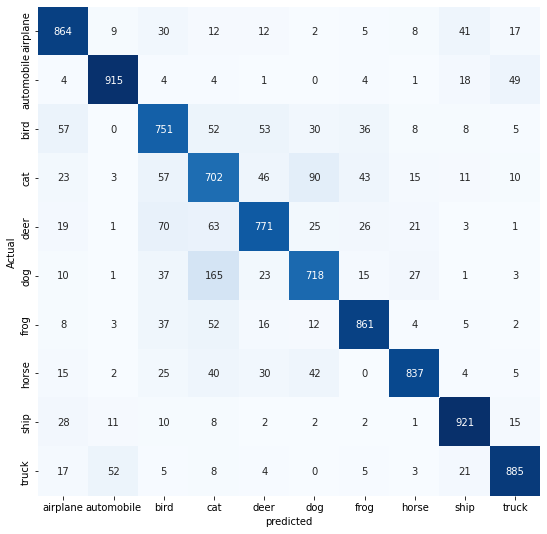

In [70]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# predicting test data
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)

# y_test = np.argmax(y_test, axis = 1)


# creating confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels , yticklabels=labels , fmt="d", annot=True, cmap=plt.cm.Blues)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

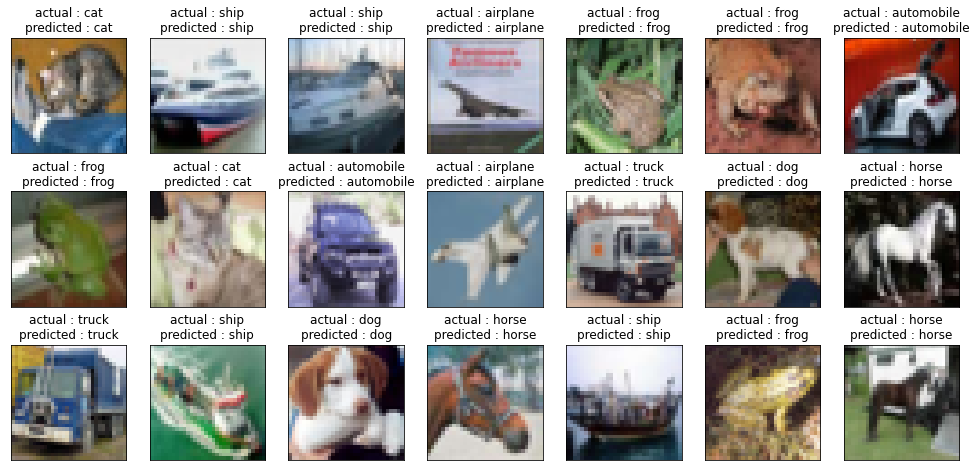

In [77]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)


fig,axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17,8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title("actual : " + labels[y_test[index]] + '\n' + "predicted : " + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap="gray")
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
